In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions

In [28]:
df = pd.read_csv('./fruit3class.csv', header=0)

df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m       15 non-null     float64
 1   d       15 non-null     float64
 2   target  15 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 492.0 bytes


,m,d,target
count,15.000000,15.000000,15.000000
mean,7.366667,4.486667,0.533333
std,1.077475,0.952340,0.743223
min,5.700000,3.100000,0.000000
25%,6.550000,3.700000,0.000000
50%,7.400000,4.400000,0.000000
75%,8.100000,5.150000,1.000000
max,9.000000,6.000000,2.000000


In [29]:
df.target.value_counts()
df.target.unique()

array([0, 1, 2])

<Axes: xlabel='m', ylabel='d'>

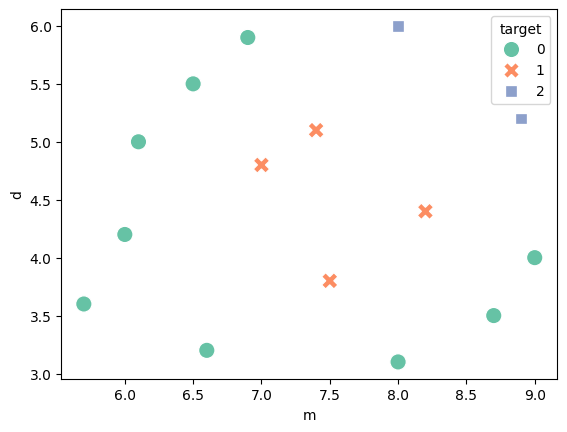

In [30]:
sns.scatterplot(data=df, x="m", y="d", hue='target', style='target', palette='Set2', s=140)

In [31]:
X = df.drop('target', axis=1, )
y = df.target
print(X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
y_train = y.values

model = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=1)

model.fit(X_train, y_train)
print("score:", model.score(X_train, y_train))
print("predict:", model.predict(X_train))
print("target:", y_train)
print("epochs:", model.n_iter_)

      m    d
0   6.0  4.2
1   5.7  3.6
2   6.5  5.5
3   6.6  3.2
4   6.9  5.9
5   8.0  3.1
6   8.2  4.4
7   7.0  4.8
8   7.5  3.8
9   7.4  5.1
10  8.9  5.2
11  8.0  6.0
12  9.0  4.0
13  6.1  5.0
14  8.7  3.5
score: 1.0
predict: [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]
target: [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]
epochs: 604


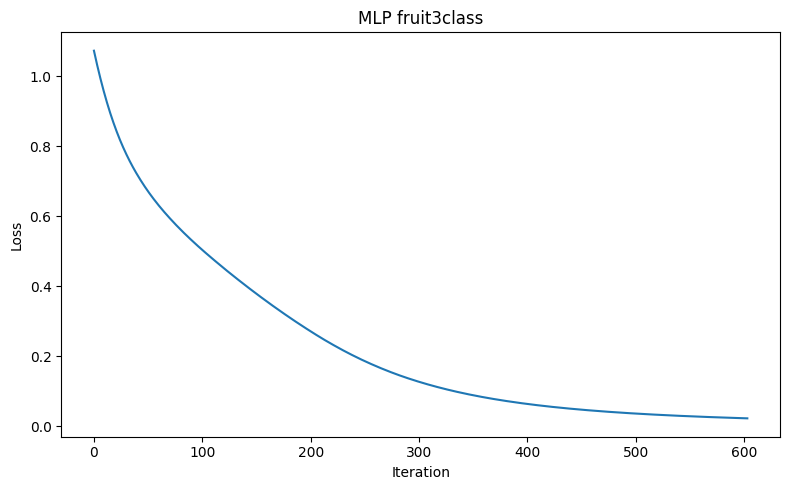

In [32]:
plt.figure(figsize=(8, 5))
plt.title("MLP fruit3class")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(model.loss_curve_)
plt.tight_layout()

In [33]:
[coef.shape for coef in model.coefs_]  # (input, hidden), (hidden, output)

[(2, 100), (100, 3)]

Text(0, 0.5, 'd (cm)')

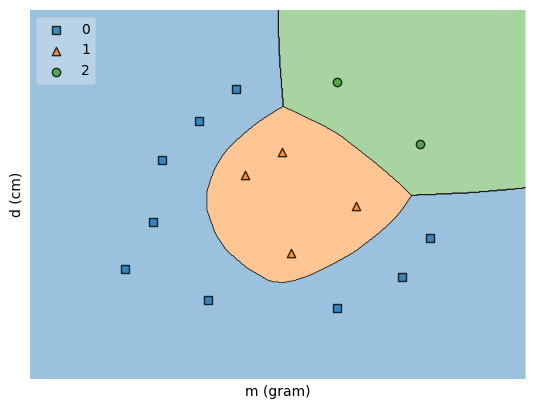

In [34]:
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (cm)')

In [35]:
# save model
import pickle
with open('model_fruit3class.pkl', 'wb') as f:
    pickle.dump(model, f)

In [36]:
# load model
import pickle
with open('model_fruit3class.pkl', 'rb') as f:
    model = pickle.load(f)

In [39]:
# new data 2 set (m, d)
X_new = [[8.4, 5.2], [6.8, 4.2]]
# add header
X_new = pd.DataFrame(X_new, columns=['m', 'd'])
print(X_new)
# standardization
# scaler = StandardScaler()
X_new_sc = scaler.fit_transform(X_new)
# X_new_sc = scaler.transform(X_new)

model.predict(X_new_sc)

     m    d
0  8.4  5.2
1  6.8  4.2


array([2, 0])

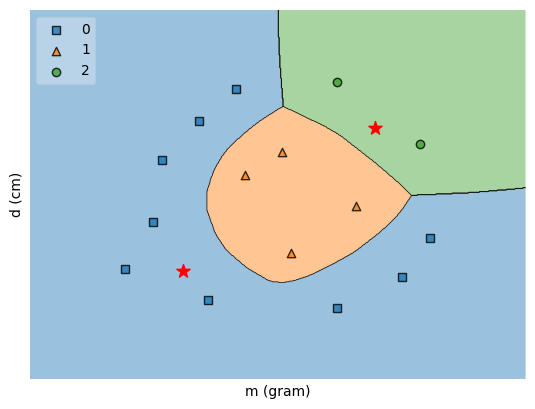

In [40]:
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (cm)')
# add new data
plt.scatter(X_new_sc[:,0], X_new_sc[:,1], s=100, marker='*', c='r')